# IAU projekt

> Roman Bitarovský, Emma Macháčová

## Zadanie
Znečistenie ovzdušia spôsobuje vážne dýchacie a srdcové ochorenia, ktoré môžu byť smrteľné. Najčastejšie sú postihnuté deti, čo vedie k zápalu pľúc a problémom s dýchaním vrátane astmy. Kyslé dažde, ničenie ozónovej vrstvy a globálne otepľovanie sú niektoré z nepriaznivých dôsledkov. Dátová sada pre Vás (World's Air Pollution: Real-time Air Quality Index https://waqi.info/) predstavuje záznamy jednotlivých meraní kvality ovzdušia ako kombinácia mnohých faktorov bez časovej následnosti. V záznamoch je závislá premenná s menom “warning” indikujúca alarmujúci stav kvality ovzdušia. Vo veľkých mestách ako napr. Peking (angl. Beijing, hlavné mesto Číny s viac ako 21 miliónov ľudí) sa pri varovaní spustí opatrenie ako obmedzenie pohybov áut a ľudí v meste alebo umelý dážď až pokiaľ kvalita vzduchu sa nevráti do normu.

* Úlohou je predikovať závislé hodnoty premennej “warning” pomocou metód strojového učenia.
* Pritom sa treba vysporiadať s viacerými problémami, ktoré sa v dátach nachádzajú ako formáty dát, chýbajúce, vychýlené hodnoty a pod.


### Slovníček
* PM2.5 - Particulate Matter (µg/m3) 
* PM10 - Particulate Matter (µg/m3) 
* NOx - Nitrogen Oxides (µg/m3)
* NO2 - Nitrogen Dioxide (µg/m3)
* SO2 - Sulfur Dioxide  (µg/m3)
* CO - Carbon Monoxide emissions  (µg/m3)
* CO2 - Carbon Dioxide  (µg/m3)
* PAHs - Polycyclic Aromatic Hydrocarbons  (µg/m3)
* NH3 - Ammonia trace  (µg/m3)
* Pb - Lead  (µg/m3)
* TEMP - Temperature (degree Celsius)
* DEWP - Dew point temperature (degree Celsius)
* PRES - Pressure (hPa, <100, 1050>)
* RAIN - Rain (mm)
* WSPM - Wind Speed (m/s)
* WD - Wind Direction
* VOC - Volatile Organic Compounds
* CFCs - Chlorofluorocarbons
* C2H3NO5 - Peroxyacetyl nitrate
* H2CO - Plywood emit formaldehyde
* GSTM1 - Glutathione-S transferase M1
* 1-OHP - 1-hydroxypyrene
* 2-OHF - 2-hydroxyfluorene
* 2-OHNa - 2-hydroxynaphthalene
* N2 - Nitrogen
* O2 - Oxygen
* O3 - Ozone
* Ar - Argon
* Ne - Neon
* CH4 - Methane
* He - Helium
* Kr - Krypton
* I2 - Iodine
* H2 - Hydrogen
* Xe - Xenon

## Data init

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
labor_measurements = pd.read_csv('../081/measurements.csv', sep='\t')
labor_stations = pd.read_csv('../081/stations.csv', sep='\t')

## Fáza 1
Základný opis dát spolu s ich charakteristikami (5b) <br>
V tejto fáze uveďte:
* Počet záznamov, počet atribútov, ich typy,
* Pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.
* Párová analýza dát: preskúmajte vzťahy medzi zvolenými dvojicami atribútov. 
* Párová analýza dát: Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie)
* Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).

In [3]:
labor_measurements.head()

,latitude,PM2.5,NOx,PM10,C2H3NO5,CH4,longitude,Pb,TEMP,NH3,SO2,O3,CO,PAHs,H2CO,PRES,warning,CFCs
0,37.71715,8.47714,9.21522,9.38738,1.51791,7.84989,-122.40433,59.51096,20.05101,10.43604,5.81201,7.77502,9.69678,8.62090,47.64810,1139.12673,0.0,74.87342
1,-1.26753,8.95287,8.04229,8.78120,0.86506,7.48764,116.82887,57.03798,20.34841,9.19522,8.62588,11.61089,4.92266,6.96953,42.66369,1144.57479,1.0,70.13254
2,25.87498,11.41105,7.80172,6.67488,0.20478,8.32353,86.59611,78.98660,19.57588,5.00666,6.37696,11.20430,7.61260,7.88382,48.15920,1131.93163,1.0,70.76611
3,53.02330,5.41284,9.53800,7.01510,0.13092,6.36073,-1.48119,60.70261,20.51904,8.38101,9.96460,6.31462,6.68230,9.13018,30.33567,1176.70245,0.0,68.30109
4,-7.09810,5.59043,6.87675,6.19817,0.19487,6.55752,109.32430,79.16126,-1.60515,8.05129,9.76426,6.23701,4.50154,8.72864,49.04137,1058.87434,0.0,70.50372


In [4]:
print('Počet záznamov: ', labor_measurements.shape[0])
print('Počet atribútov: ', labor_measurements.shape[1])
print('\nTypy atribútov:')
display(labor_measurements.dtypes)

Počet záznamov:  12118
Počet atribútov:  18

Typy atribútov:


latitude     float64
PM2.5        float64
NOx          float64
PM10         float64
C2H3NO5      float64
CH4          float64
longitude    float64
Pb           float64
TEMP         float64
NH3          float64
SO2          float64
O3           float64
CO           float64
PAHs         float64
H2CO         float64
PRES         float64
warning      float64
CFCs         float64
dtype: object

In [5]:
if (labor_measurements.duplicated().any()):
    print('Merania pocet duplikatov', len(labor_measurements)-len(labor_measurements.drop_duplicates()))
else:
    print('No duplicates')

Merania pocet duplikatov 179


In [6]:
labor_stations.head()

,latitude,revision,longitude,code,QoS,location
0,-1.60000,2019-02-02,103.61667,ID,maitennce,Asia/Jakarta
1,29.84576,"06/06/2022, 00:00:00",-90.10674,US,average,America/Chicago
2,33.03699,24 Feb 2015,-117.29198,US,good,America/Los_Angeles
3,31.84568,2017/03/10,-102.36764,US,accep,America/Chicago
4,16.06213,2015/05/29,76.05860,IN,average,Asia/Kolkata


In [7]:
print('Počet záznamov: ', labor_stations.shape[0])
print('Počet atribútov: ', labor_stations.shape[1])
print('\nTypy atribútov:')
display(labor_stations.dtypes)

Počet záznamov:  1061
Počet atribútov:  6

Typy atribútov:


latitude     float64
revision      object
longitude    float64
code          object
QoS           object
location      object
dtype: object

In [8]:
if (labor_stations.duplicated().any()):
    print('Merania pocet duplikatov', len(labor_stations)-len(labor_stations.drop_duplicates()))
else:
    print('No duplicates')

No duplicates


### Data merge
Najskôr dropneme zo labor_stations nepotrebné stĺpce a následne aj duplikáty

In [9]:
labor_stations.drop(labor_stations.columns[1], axis=1, inplace=True)
labor_stations.drop(labor_stations.columns[2:4], axis=1, inplace=True)
labor_stations.head()

if (labor_stations.duplicated().any()):
    labor_stations = labor_stations.drop_duplicates()
    print('Duplicates were droped')
else:
    print('No duplicates')

Duplicates were droped


Následne vykonáme merge na základe súradníc

In [10]:
# Table merge
df = pd.merge(labor_measurements, labor_stations, how='inner', left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])

Dropneme stĺpce obahujúce súradnice lebo ich už viac nepotrebujem vzhľadom na stĺpec location

In [11]:
df = df.drop(columns=['latitude', 'longitude'])

Dropneme neplatné hodnoty

In [12]:
df.replace('', np.nan, inplace=True)
df = df.dropna()

In [13]:
# toto zatial nechame lebo sa mohla viac krat namerat tá ista hodnota v inom case
# df.drop_duplicates()

In [14]:
print('Počet záznamov: ', df.shape[0])
print('Počet atribútov: ', df.shape[1])
print('\nTypy atribútov:')
display(df.dtypes)

Počet záznamov:  11406
Počet atribútov:  17

Typy atribútov:


PM2.5       float64
NOx         float64
PM10        float64
C2H3NO5     float64
CH4         float64
Pb          float64
TEMP        float64
NH3         float64
SO2         float64
O3          float64
CO          float64
PAHs        float64
H2CO        float64
PRES        float64
warning     float64
CFCs        float64
location     object
dtype: object

In [15]:
df.columns.values
df = df[['location', 'warning', 'TEMP', 'PRES', 'PM2.5', 'NOx', 'PM10', 'C2H3NO5', 'CH4', 'Pb', 'NH3', 'SO2', 'O3', 'CO', 'PAHs', 'H2CO', 'CFCs']]

In [16]:
df.head()

,location,warning,TEMP,PRES,PM2.5,NOx,PM10,C2H3NO5,CH4,Pb,NH3,SO2,O3,CO,PAHs,H2CO,CFCs
0,America/Los_Angeles,0.0,20.05101,1139.12673,8.47714,9.21522,9.38738,1.51791,7.84989,59.51096,10.43604,5.81201,7.77502,9.69678,8.62090,47.64810,74.87342
1,America/Los_Angeles,1.0,21.55701,1115.19699,7.36880,9.66741,8.19826,0.64236,8.48027,54.03980,9.62838,7.97135,9.72566,5.83821,8.28391,64.99154,63.42154
2,America/Los_Angeles,1.0,3.06998,1086.02547,9.81855,9.66138,6.16989,0.23616,8.49506,47.32216,6.38848,6.14333,9.73098,7.37730,5.98279,43.12537,71.61779
3,America/Los_Angeles,1.0,10.04558,1168.02340,8.76470,10.27526,7.10130,0.17080,7.35744,48.49527,8.11869,6.74522,9.63330,4.89810,8.76285,43.67037,64.64020
4,America/Los_Angeles,1.0,24.88676,1061.95581,6.76710,9.95663,8.35517,0.75765,6.98671,52.91472,8.87397,9.24788,8.40595,10.82485,7.88543,40.39068,70.46390


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11406 entries, 0 to 12117
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  11406 non-null  object 
 1   warning   11406 non-null  float64
 2   TEMP      11406 non-null  float64
 3   PRES      11406 non-null  float64
 4   PM2.5     11406 non-null  float64
 5   NOx       11406 non-null  float64
 6   PM10      11406 non-null  float64
 7   C2H3NO5   11406 non-null  float64
 8   CH4       11406 non-null  float64
 9   Pb        11406 non-null  float64
 10  NH3       11406 non-null  float64
 11  SO2       11406 non-null  float64
 12  O3        11406 non-null  float64
 13  CO        11406 non-null  float64
 14  PAHs      11406 non-null  float64
 15  H2CO      11406 non-null  float64
 16  CFCs      11406 non-null  float64
dtypes: float64(16), object(1)
memory usage: 1.6+ MB


In [18]:
war_count = df['warning'].value_counts()
war_count

1.0    6776
0.0    4630
Name: warning, dtype: int64

<AxesSubplot: title={'center': 'Warning visual ratio'}, ylabel='warning'>

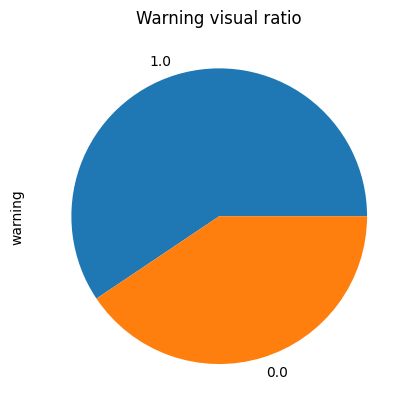

In [19]:
war_count.plot(kind='pie', title='Warning visual ratio')

array([[<AxesSubplot: title={'center': 'C2H3NO5'}>,
        <AxesSubplot: title={'center': 'CFCs'}>,
        <AxesSubplot: title={'center': 'CH4'}>,
        <AxesSubplot: title={'center': 'CO'}>],
       [<AxesSubplot: title={'center': 'H2CO'}>,
        <AxesSubplot: title={'center': 'NH3'}>,
        <AxesSubplot: title={'center': 'NOx'}>,
        <AxesSubplot: title={'center': 'O3'}>],
       [<AxesSubplot: title={'center': 'PAHs'}>,
        <AxesSubplot: title={'center': 'PM10'}>,
        <AxesSubplot: title={'center': 'PM2.5'}>,
        <AxesSubplot: title={'center': 'PRES'}>],
       [<AxesSubplot: title={'center': 'Pb'}>,
        <AxesSubplot: title={'center': 'SO2'}>,
        <AxesSubplot: title={'center': 'TEMP'}>,
        <AxesSubplot: title={'center': 'warning'}>]], dtype=object)

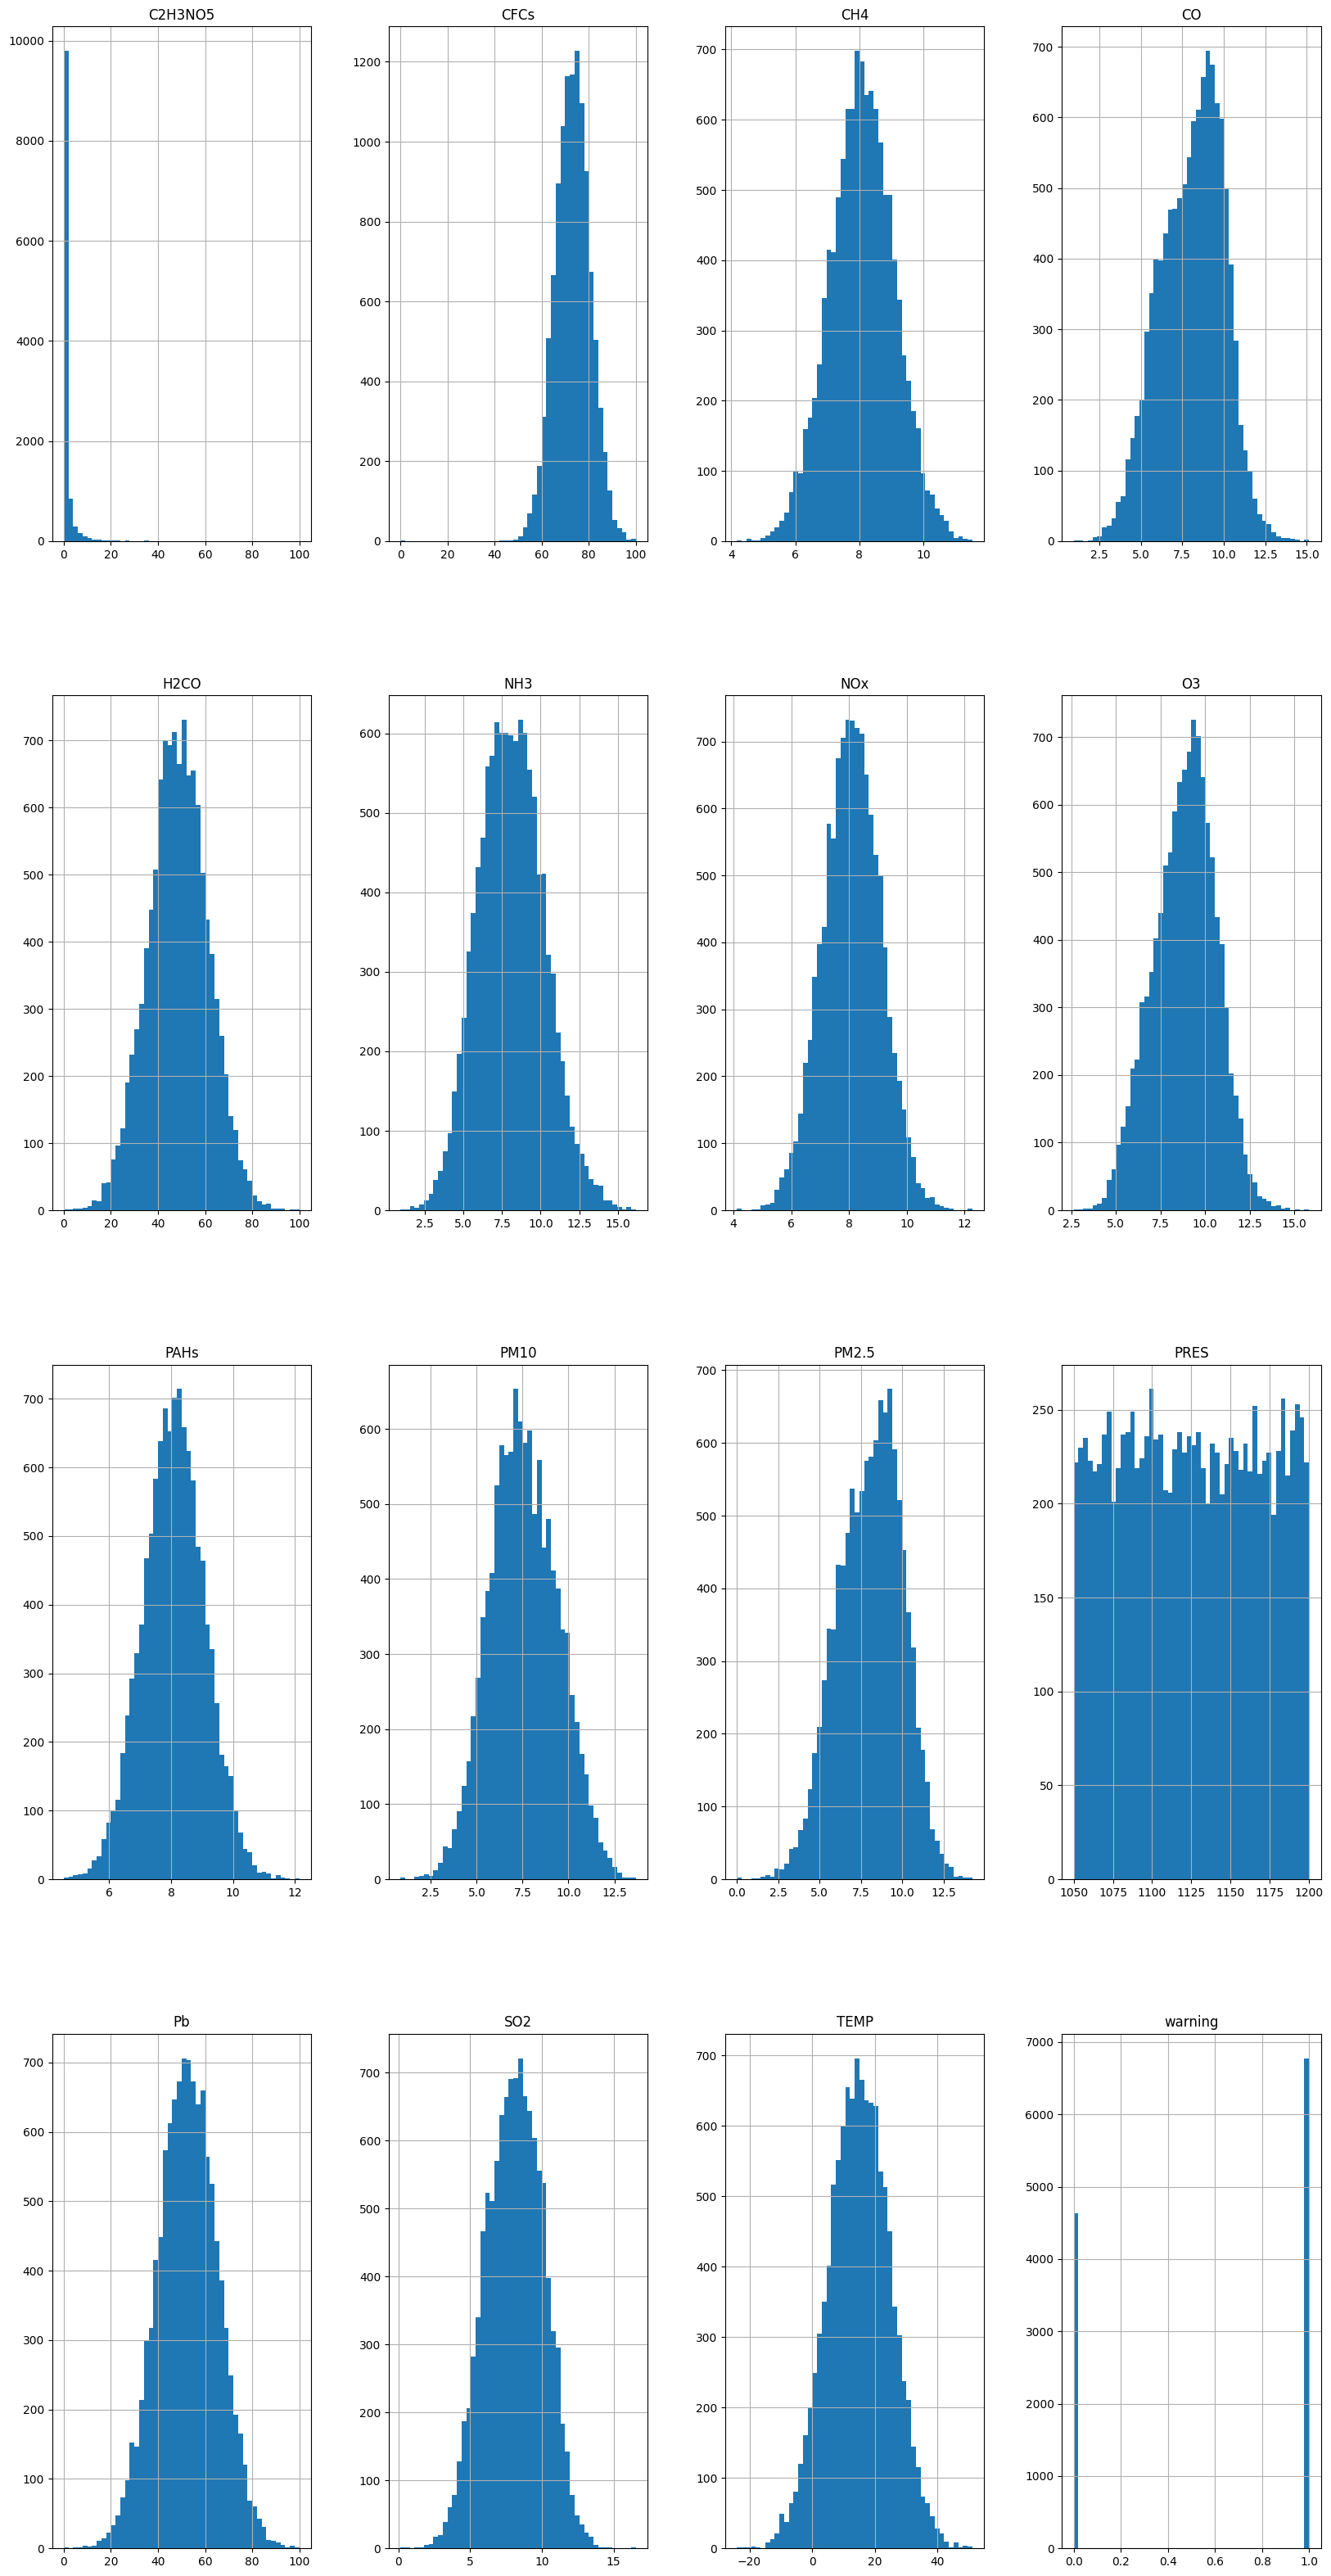

In [20]:
df.loc[:, df.columns.difference(["index"])].hist(sharex=False, sharey=False, figsize=(20, 40), bins=50)

Text(0.5, 0, 'Percentage')

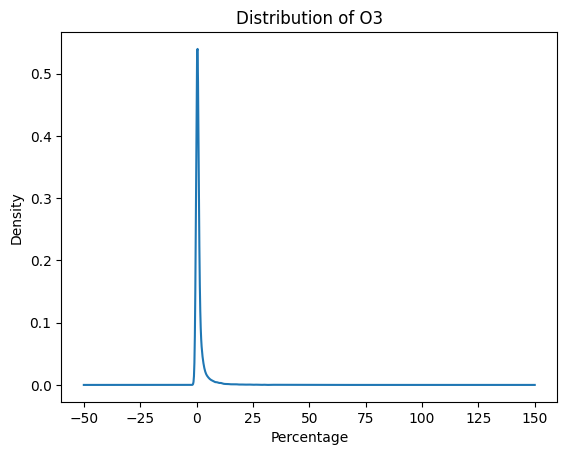

In [21]:
# jediná nenormálová zaujímavá distribúcia
df['C2H3NO5'].plot(kind='kde')
plt.title('Distribution of O3')
plt.xlabel('Percentage')

C2H3NO5       AxesSubplot(0.125,0.712609;0.168478x0.167391)
CFCs       AxesSubplot(0.327174,0.712609;0.168478x0.167391)
CH4        AxesSubplot(0.529348,0.712609;0.168478x0.167391)
CO         AxesSubplot(0.731522,0.712609;0.168478x0.167391)
H2CO          AxesSubplot(0.125,0.511739;0.168478x0.167391)
NH3        AxesSubplot(0.327174,0.511739;0.168478x0.167391)
NOx        AxesSubplot(0.529348,0.511739;0.168478x0.167391)
O3         AxesSubplot(0.731522,0.511739;0.168478x0.167391)
PAHs           AxesSubplot(0.125,0.31087;0.168478x0.167391)
PM10        AxesSubplot(0.327174,0.31087;0.168478x0.167391)
PM2.5       AxesSubplot(0.529348,0.31087;0.168478x0.167391)
PRES        AxesSubplot(0.731522,0.31087;0.168478x0.167391)
Pb                AxesSubplot(0.125,0.11;0.168478x0.167391)
SO2            AxesSubplot(0.327174,0.11;0.168478x0.167391)
TEMP           AxesSubplot(0.529348,0.11;0.168478x0.167391)
warning        AxesSubplot(0.731522,0.11;0.168478x0.167391)
dtype: object

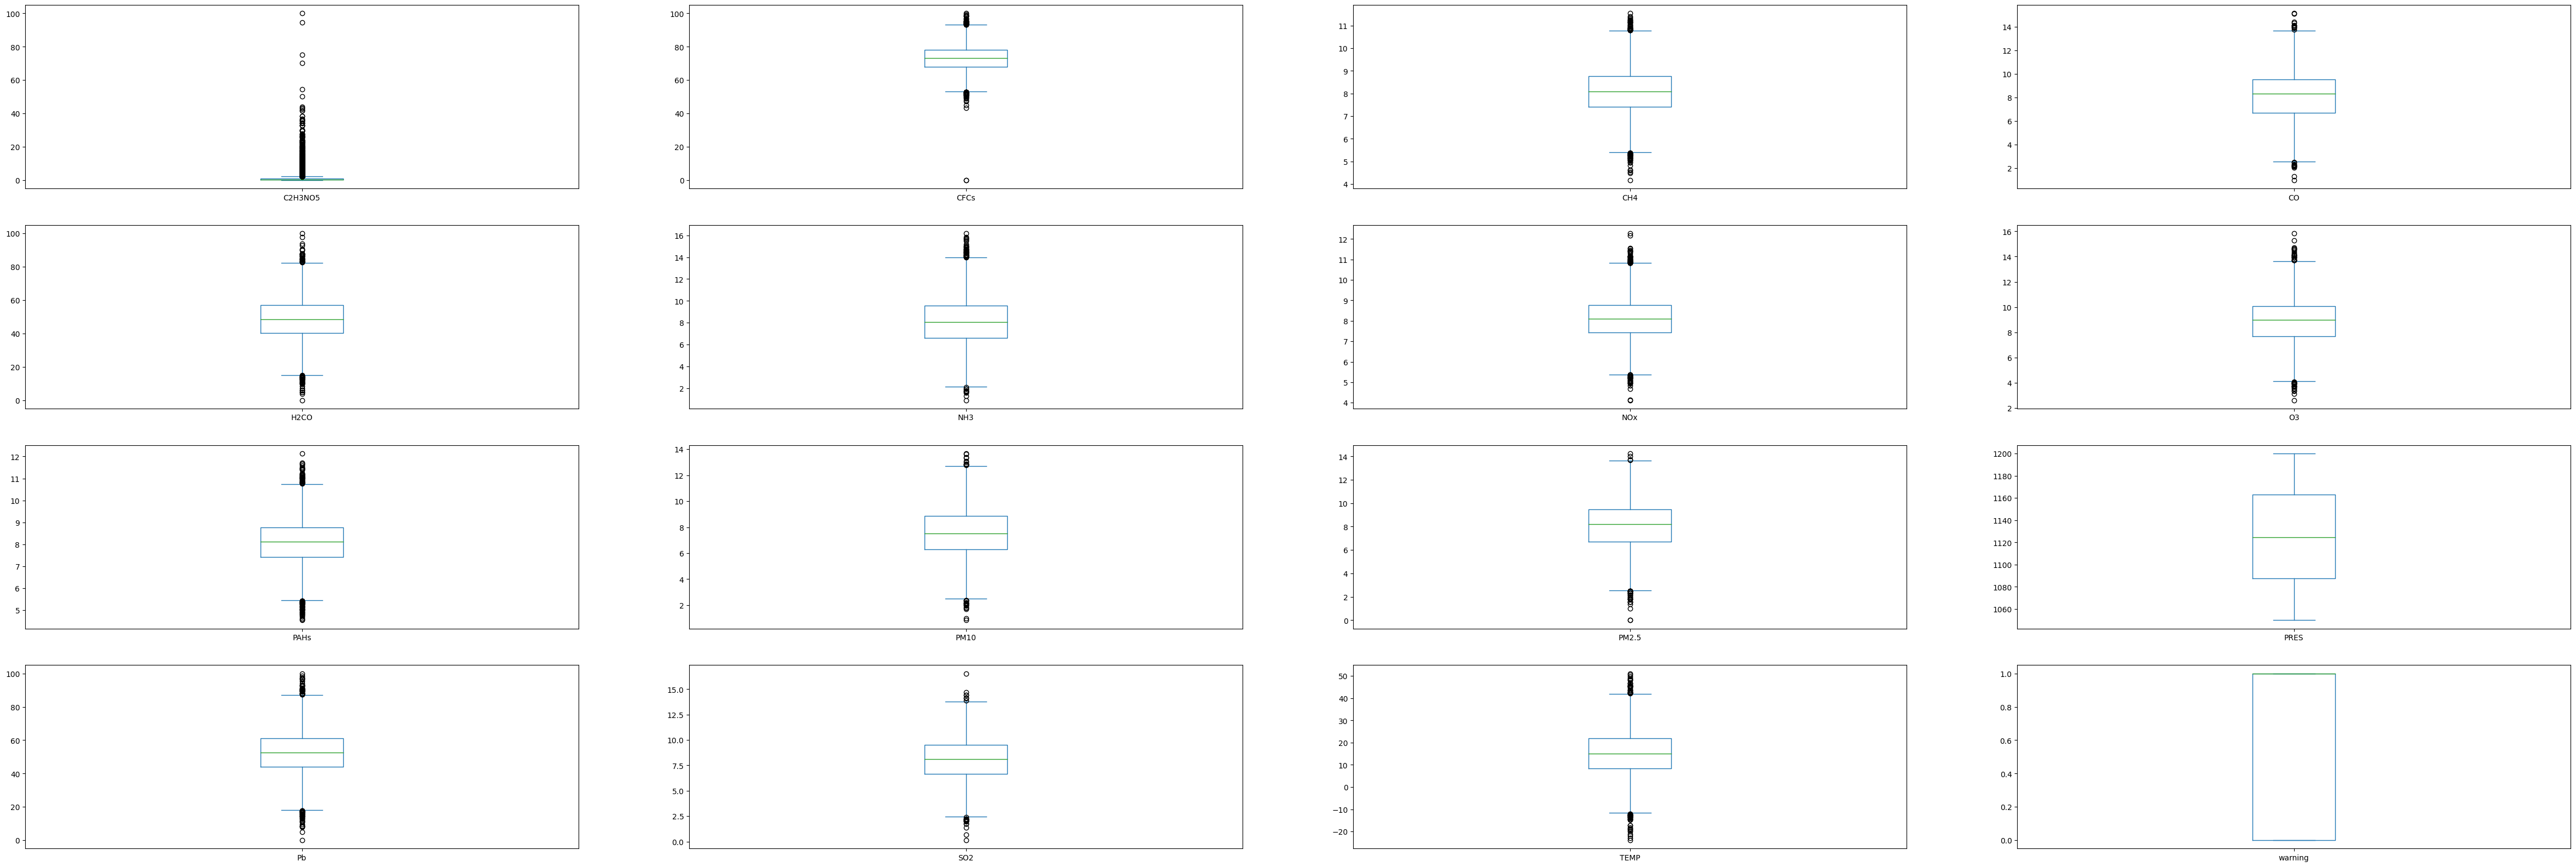

In [22]:
df.loc[:, df.columns.difference(["index"])].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(60, 20), layout=(4, 4))

In [23]:
# sns.pairplot(df, hue="warning")

In [24]:
# analysis of correlations
df_nums_only = df.copy()
df_nums_only = df_nums_only.drop(columns=['location'])
df_nums_only_corr = df_nums_only.corr()

<AxesSubplot: >

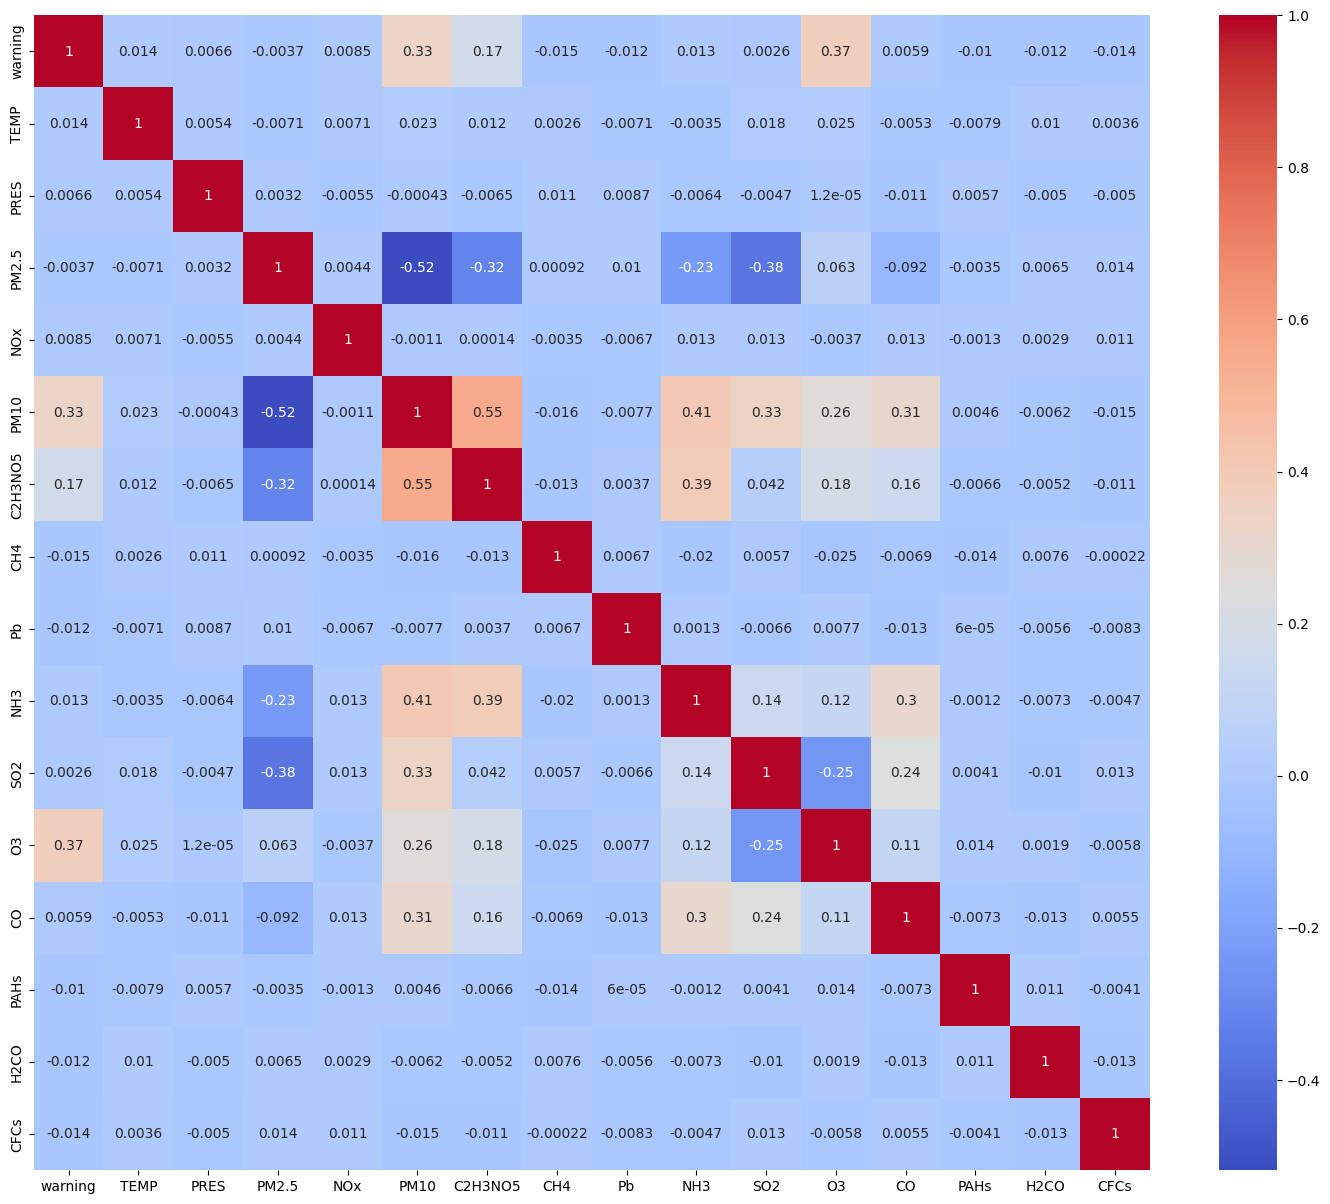

In [25]:
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(df_nums_only_corr, ax=ax, annot=True, cmap='coolwarm')

In [26]:
df_nums_only_corr[((df_nums_only_corr >= 0.39) | (df_nums_only_corr <= -0.39)) & (df_nums_only_corr != 1)]

,warning,TEMP,PRES,PM2.5,NOx,PM10,C2H3NO5,CH4,Pb,NH3,SO2,O3,CO,PAHs,H2CO,CFCs
warning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM2.5,NaN,NaN,NaN,NaN,NaN,-0.518991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM10,NaN,NaN,NaN,-0.518991,NaN,NaN,0.551277,NaN,NaN,0.406084,NaN,NaN,NaN,NaN,NaN,NaN
C2H3NO5,NaN,NaN,NaN,NaN,NaN,0.551277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH3,NaN,NaN,NaN,NaN,NaN,0.406084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='PM10', ylabel='PM2.5'>

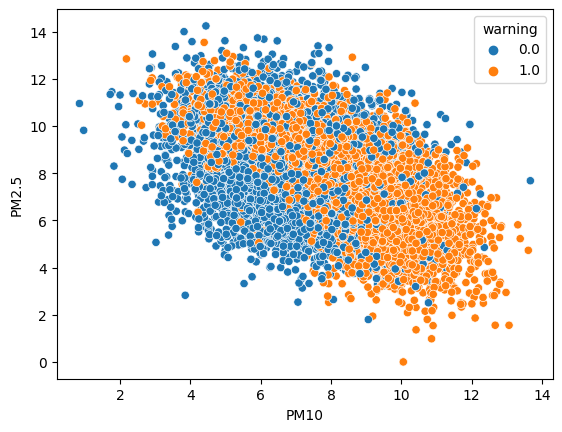

In [27]:
# nič moc korelácia
sns.scatterplot(x=df_nums_only['PM10'], y=df_nums_only['PM2.5'], hue=df_nums_only['warning'])

<AxesSubplot: xlabel='NH3', ylabel='PM10'>

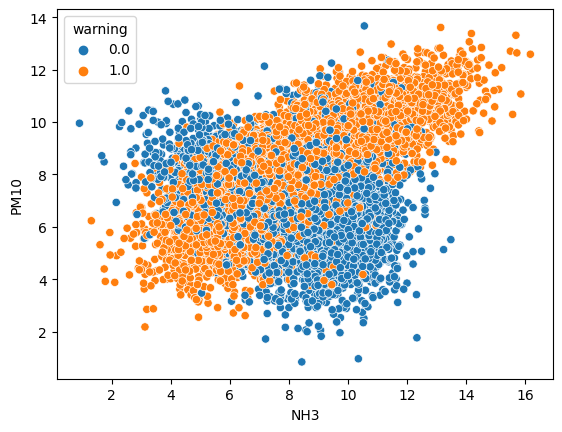

In [28]:
# nič moc korelácia
sns.scatterplot(x=df_nums_only['NH3'], y=df_nums_only['PM10'], hue=df_nums_only['warning'])

<AxesSubplot: xlabel='C2H3NO5', ylabel='PM10'>

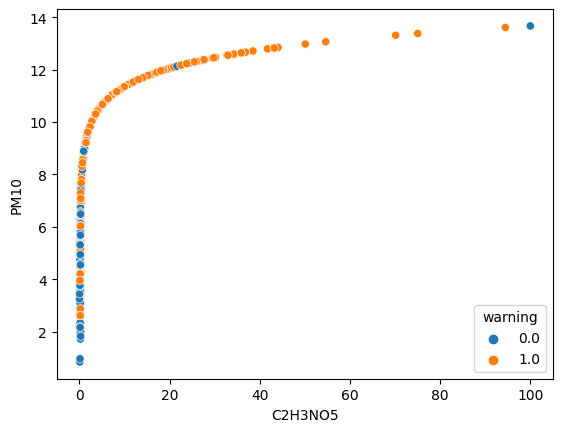

In [29]:
# good korelácia
sns.scatterplot(x=df_nums_only['C2H3NO5'], y=df_nums_only['PM10'], hue=df_nums_only['warning'])